<a href="https://colab.research.google.com/github/HarshitManik/Drone_classification_project/blob/main/Drone_classification_spectogram_cnn_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
dataset_path = "/content/RRN_ATR_Net_dataset.zip"
extract_folder = "/content/RRN_ATR_Net_dataset"


In [5]:
import zipfile

# Specify the path to the zip file
zip_file_path = '/content/RRN_ATR_Net_dataset.zip'

# Specify the directory to extract to
extract_directory = '/content/'  # You can change this to your desired location

# Open the zip file in read mode
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all files to the specified directory
    zip_ref.extractall(extract_directory)

print(f"The '{zip_file_path}' file has been successfully unzipped to '{extract_directory}'.")


The '/content/RRN_ATR_Net_dataset.zip' file has been successfully unzipped to '/content/'.


In [9]:
import os
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import shutil
from scipy.signal import spectrogram
from zipfile import ZipFile
from google.colab import files

# Upload the zip file
uploaded = files.upload()

# Step 1: Extract the ZIP file
dataset_path = "/content/RRN_ATR_Net_dataset.zip"
extract_folder = "/content/RRN_ATR_Net_dataset"

with ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# ... (rest of the code remains the same, but update output_dir) ...

# Step 4: Iterate Over Dataset
for category in os.listdir(extract_folder):
    category_path = os.path.join(extract_folder, category)
    #... (rest of the code remains the same)

print("✅ Spectrogram images saved successfully!")

Saving RRN_ATR_Net_dataset.zip to RRN_ATR_Net_dataset (1).zip
✅ Spectrogram images saved successfully!


In [12]:
dataset_path = "/content/RRN_ATR_Net_dataset.zip"


In [16]:
import os
import numpy as np
import scipy.io
import scipy.signal
import matplotlib.pyplot as plt

# Define paths
data_folder = "/content/RRN_ATR_Net_dataset"  # Change this to your extracted folder path
output_folder = "/content/spectrogram_images"

# Create output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Define STFT parameters
nwin = 64
window = np.hamming(nwin)
nlap = nwin - 2
nfft = 128
fs = 10000  # Sampling frequency

# Loop through all MATLAB files in the dataset folder
for filename in os.listdir(data_folder):
    if filename.endswith(".mat"):
        file_path = os.path.join(data_folder, filename)

        # Load .mat file
        mat_data = scipy.io.loadmat(file_path)
        if "target_bin_part" in mat_data:
            rawdata = mat_data["target_bin_part"].squeeze()  # Extract and flatten

            # Compute STFT (Short-Time Fourier Transform)
            f, t, Sxx = scipy.signal.spectrogram(rawdata, fs, window=window, noverlap=nlap, nfft=nfft, mode='magnitude')

            # Convert to dB scale
            Sxx_db = 10 * np.log10(Sxx + 1e-10)  # Avoid log(0) error

            # Plot and save spectrogram
            plt.figure(figsize=(6, 4))
            plt.imshow(Sxx_db, aspect='auto', cmap='jet', origin='lower', extent=[t.min(), t.max(), f.min(), f.max()])
            plt.colorbar(label="Power (dB)")
            plt.xlabel("Time (s)")
            plt.ylabel("Frequency (Hz)")
            plt.title(f"Spectrogram of {filename}")

            # Save image
            img_path = os.path.join(output_folder, filename.replace(".mat", ".png"))
            plt.savefig(img_path, dpi=300, bbox_inches='tight')
            plt.close()

print(f"✅ Spectrogram images saved in {output_folder}")



✅ Spectrogram images saved in /content/spectrogram_images


In [17]:
import os

output_folder = "/content/spectrogram_images"
print(os.listdir(output_folder))


[]


In [19]:
import os

dataset_folder = "/content/RRN_ATR_Net_dataset"  # Update with the correct folder name
if os.path.exists(dataset_folder):
    print("✅ Dataset folder found.")
    print("Contents:", os.listdir(dataset_folder))
else:
    print("❌ Dataset folder NOT found. Check the extraction process.")



✅ Dataset folder found.
Contents: ['read_data.txt', 'read_data.m', 'fixed_wing', 'Abstract.docx', 'bird', 'RRN_ATR_Net_dataset', 'helicopter', 'quadrotor']


In [20]:
mat_files = [f for f in os.listdir(dataset_folder) if f.endswith(".mat")]
print(f"Found {len(mat_files)} .mat files:", mat_files[:5])  # Show first 5 files


Found 0 .mat files: []


In [21]:
import os

extracted_folder = "/content/RRN_ATR_Net_dataset"  # Update if needed
if os.path.exists(extracted_folder):
    print("✅ Extracted folder found.")
    print("Contents:", os.listdir(extracted_folder))
else:
    print("❌ Extracted folder NOT found. Check the extraction process.")


✅ Extracted folder found.
Contents: ['read_data.txt', 'read_data.m', 'fixed_wing', 'Abstract.docx', 'bird', 'RRN_ATR_Net_dataset', 'helicopter', 'quadrotor']


In [22]:
import os

dataset_root = "/content/RRN_ATR_Net_dataset"  # Update if needed
mat_files = []

for root, _, files in os.walk(dataset_root):
    for file in files:
        if file.endswith(".mat"):
            mat_files.append(os.path.join(root, file))

print(f"✅ Found {len(mat_files)} .mat files.")
if mat_files:
    print("📂 Example files:", mat_files[:5])  # Show first 5
else:
    print("❌ No .mat files found. Check dataset structure.")


✅ Found 2400 .mat files.
📂 Example files: ['/content/RRN_ATR_Net_dataset/fixed_wing/263.mat', '/content/RRN_ATR_Net_dataset/fixed_wing/82.mat', '/content/RRN_ATR_Net_dataset/fixed_wing/171.mat', '/content/RRN_ATR_Net_dataset/fixed_wing/7.mat', '/content/RRN_ATR_Net_dataset/fixed_wing/210.mat']


In [24]:
import scipy.io
import os

# Select a sample .mat file to inspect
sample_file = "/content/RRN_ATR_Net_dataset/fixed_wing/263.mat"  # Change to any existing file

# Load the .mat file
data = scipy.io.loadmat(sample_file)

# Print all keys available in the file
print("🔍 Available keys in the .mat file:", list(data.keys()))


🔍 Available keys in the .mat file: ['__header__', '__version__', '__globals__', 'rawdata']


In [26]:
if "rawdata" in data:
    rawdata = data["rawdata"].astype(np.float32).flatten()  # Convert to float32


<ipython-input-26-ef3a68dc7373>:2: ComplexWarning: Casting complex values to real discards the imaginary part
  rawdata = data["rawdata"].astype(np.float32).flatten()  # Convert to float32


In [28]:
import os
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import librosa.display

# Path where the dataset is extracted
dataset_path = "/content/RRN_ATR_Net_dataset"
output_folder = "/content/spectrogram_images"

# Ensure the output directory exists
os.makedirs(output_folder, exist_ok=True)

# Process all .mat files
for category in os.listdir(dataset_path):
    category_path = os.path.join(dataset_path, category)

    if not os.path.isdir(category_path):
        continue  # Skip if not a directory

    for file_name in os.listdir(category_path):
        if file_name.endswith(".mat"):
            file_path = os.path.join(category_path, file_name)

            try:
                data = scipy.io.loadmat(file_path)

                # ✅ Use 'rawdata' instead of 'target_bin_part'
                if "rawdata" in data:
                    rawdata = data["rawdata"].astype(np.float32).flatten()  # Convert to float32

                    # Generate spectrogram
                    nfft = 128
                    hop_length = 62  # Similar to nlap in MATLAB
                    S = np.abs(librosa.stft(rawdata, n_fft=nfft, hop_length=hop_length))

                    # Convert to dB scale
                    S_db = librosa.amplitude_to_db(S, ref=np.max)

                    # Save spectrogram image
                    plt.figure(figsize=(8, 4))
                    librosa.display.specshow(S_db, sr=10000, x_axis="time", y_axis="log", cmap="jet")
                    plt.axis("off")  # Hide axes
                    plt.savefig(os.path.join(output_folder, f"{category}_{file_name}.png"), bbox_inches="tight", pad_inches=0)
                    plt.close()

                    print(f"✅ Saved: {category}_{file_name}.png")
                else:
                    print(f"⚠️ Skipping {file_name}, 'rawdata' not found.")

            except Exception as e:
                print(f"❌ Error processing {file_name}: {e}")


<ipython-input-28-668b035dfe8a>:30: ComplexWarning: Casting complex values to real discards the imaginary part
  rawdata = data["rawdata"].astype(np.float32).flatten()  # Convert to float32


✅ Saved: fixed_wing_263.mat.png
✅ Saved: fixed_wing_82.mat.png
✅ Saved: fixed_wing_171.mat.png
⚠️ Skipping 7.mat, 'rawdata' not found.
✅ Saved: fixed_wing_210.mat.png
✅ Saved: fixed_wing_151.mat.png
✅ Saved: fixed_wing_226.mat.png
✅ Saved: fixed_wing_218.mat.png
✅ Saved: fixed_wing_147.mat.png
✅ Saved: fixed_wing_89.mat.png
✅ Saved: fixed_wing_120.mat.png
✅ Saved: fixed_wing_287.mat.png
✅ Saved: fixed_wing_123.mat.png
✅ Saved: fixed_wing_232.mat.png
✅ Saved: fixed_wing_73.mat.png
✅ Saved: fixed_wing_206.mat.png
✅ Saved: fixed_wing_108.mat.png
✅ Saved: fixed_wing_172.mat.png
✅ Saved: fixed_wing_56.mat.png
✅ Saved: fixed_wing_158.mat.png
✅ Saved: fixed_wing_146.mat.png
✅ Saved: fixed_wing_24.mat.png
✅ Saved: fixed_wing_84.mat.png
✅ Saved: fixed_wing_165.mat.png
✅ Saved: fixed_wing_280.mat.png
✅ Saved: fixed_wing_262.mat.png
✅ Saved: fixed_wing_104.mat.png
✅ Saved: fixed_wing_159.mat.png
✅ Saved: fixed_wing_77.mat.png
✅ Saved: fixed_wing_98.mat.png
✅ Saved: fixed_wing_174.mat.png
✅ Saved:

In [30]:
import os
import cv2
import numpy as np

# Paths
dataset_path = "/content/spectrogram_images"
processed_path = "/content/processed_spectrograms"
skipped_folders = []  # Store names of skipped folders

# Create processed dataset folder
os.makedirs(processed_path, exist_ok=True)

for category in os.listdir(dataset_path):
    category_path = os.path.join(dataset_path, category)
    output_category_path = os.path.join(processed_path, category)

    # Check if the folder contains valid images
    if not os.path.isdir(category_path) or len(os.listdir(category_path)) == 0:
        print(f"⚠️ Skipped folder: {category} (No valid images)")
        skipped_folders.append(category)
        continue  # Skip this folder

    os.makedirs(output_category_path, exist_ok=True)

    for file_name in os.listdir(category_path):
        img_path = os.path.join(category_path, file_name)
        img = cv2.imread(img_path)

        if img is not None:
            img_resized = cv2.resize(img, (224, 224))  # Resize to 224x224
            img_resized = img_resized / 255.0  # Normalize pixels to [0, 1]

            # Save processed image
            cv2.imwrite(os.path.join(output_category_path, file_name), img_resized * 255)
        else:
            print(f"❌ Skipped file: {file_name} (Invalid image)")

print("\n🚀 Processing completed!")

# Save skipped folders to a text file
skipped_file_path = "/content/skipped_folders.txt"
with open(skipped_file_path, "w") as f:
    for folder in skipped_folders:
        f.write(folder + "\n")

print(f"📄 Skipped folders saved to: {skipped_file_path}")
print("⏬ Skipped Folders List:")
print("\n".join(skipped_folders))





⚠️ Skipped folder: fixed_wing_285.mat.png (No valid images)
⚠️ Skipped folder: bird_215.mat.png (No valid images)
⚠️ Skipped folder: helicopter_80.mat.png (No valid images)
⚠️ Skipped folder: bird_141.mat.png (No valid images)
⚠️ Skipped folder: helicopter_254.mat.png (No valid images)
⚠️ Skipped folder: bird_235.mat.png (No valid images)
⚠️ Skipped folder: quadrotor_86.mat.png (No valid images)
⚠️ Skipped folder: fixed_wing_66.mat.png (No valid images)
⚠️ Skipped folder: fixed_wing_126.mat.png (No valid images)
⚠️ Skipped folder: helicopter_127.mat.png (No valid images)
⚠️ Skipped folder: quadrotor_228.mat.png (No valid images)
⚠️ Skipped folder: quadrotor_135.mat.png (No valid images)
⚠️ Skipped folder: helicopter_146.mat.png (No valid images)
⚠️ Skipped folder: bird_229.mat.png (No valid images)
⚠️ Skipped folder: 1.png (No valid images)
⚠️ Skipped folder: quadrotor_160.mat.png (No valid images)
⚠️ Skipped folder: quadrotor_43.mat.png (No valid images)
⚠️ Skipped folder: fixed_wing_

In [31]:
import scipy.io
import os

# Path to the dataset
dataset_path = "/content/RRN_ATR_Net_dataset"

# Skipped folders
skipped_folders = [
    "quadrotor_237.mat.png", "bird_237.mat.png", "bird_160.mat.png",
    "fixed_wing_25.mat.png", "fixed_wing_169.mat.png", "helicopter_128.mat.png"
]  # Add full list here

for folder in skipped_folders:
    mat_file_path = os.path.join(dataset_path, folder.replace(".png", ""))  # Remove .png to get .mat file
    if os.path.exists(mat_file_path):
        print(f"\n🔍 Checking {mat_file_path}")
        try:
            data = scipy.io.loadmat(mat_file_path)
            print("✅ Available keys:", list(data.keys()))  # Print keys in the .mat file
        except Exception as e:
            print(f"❌ Error reading {folder}: {e}")
    else:
        print(f"⚠️ File {mat_file_path} not found.")


⚠️ File /content/RRN_ATR_Net_dataset/quadrotor_237.mat not found.
⚠️ File /content/RRN_ATR_Net_dataset/bird_237.mat not found.
⚠️ File /content/RRN_ATR_Net_dataset/bird_160.mat not found.
⚠️ File /content/RRN_ATR_Net_dataset/fixed_wing_25.mat not found.
⚠️ File /content/RRN_ATR_Net_dataset/fixed_wing_169.mat not found.
⚠️ File /content/RRN_ATR_Net_dataset/helicopter_128.mat not found.


In [32]:
import os

dataset_path = "/content/RRN_ATR_Net_dataset"

# List all .mat files in the dataset, including subfolders
mat_files = []
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith(".mat"):
            mat_files.append(os.path.join(root, file))

# Print results
print(f"✅ Found {len(mat_files)} .mat files.")
for file in mat_files[:10]:  # Show first 10 for preview
    print(file)


✅ Found 2400 .mat files.
/content/RRN_ATR_Net_dataset/fixed_wing/263.mat
/content/RRN_ATR_Net_dataset/fixed_wing/82.mat
/content/RRN_ATR_Net_dataset/fixed_wing/171.mat
/content/RRN_ATR_Net_dataset/fixed_wing/7.mat
/content/RRN_ATR_Net_dataset/fixed_wing/210.mat
/content/RRN_ATR_Net_dataset/fixed_wing/151.mat
/content/RRN_ATR_Net_dataset/fixed_wing/226.mat
/content/RRN_ATR_Net_dataset/fixed_wing/218.mat
/content/RRN_ATR_Net_dataset/fixed_wing/147.mat
/content/RRN_ATR_Net_dataset/fixed_wing/89.mat


In [33]:
import os

dataset_path = "/content/RRN_ATR_Net_dataset"

# Get all .mat files inside subfolders
mat_files = {}
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith(".mat"):
            category = os.path.basename(root)  # Get the subfolder name (e.g., fixed_wing, bird)
            mat_files[file] = os.path.join(root, file)  # Store the correct path

# Check if a file exists before processing
def get_correct_path(file_name):
    return mat_files.get(file_name, None)

# Example usage in your spectrogram script
mat_file_name = "25.mat"  # Replace with variable
category = "fixed_wing"  # Replace with variable

correct_path = get_correct_path(mat_file_name)
if correct_path:
    print(f"✅ Processing: {correct_path}")
else:
    print(f"⚠️ File {mat_file_name} not found in {category}!")


✅ Processing: /content/RRN_ATR_Net_dataset/quadrotor/25.mat


In [34]:
for mat_file_name, correct_path in mat_files.items():
    if correct_path:
        print(f"✅ Processing: {correct_path}")
        # Call your function to convert to spectrogram here
    else:
        print(f"⚠️ Skipping {mat_file_name}: File not found!")


✅ Processing: /content/RRN_ATR_Net_dataset/quadrotor/263.mat
✅ Processing: /content/RRN_ATR_Net_dataset/quadrotor/82.mat
✅ Processing: /content/RRN_ATR_Net_dataset/quadrotor/171.mat
✅ Processing: /content/RRN_ATR_Net_dataset/quadrotor/7.mat
✅ Processing: /content/RRN_ATR_Net_dataset/quadrotor/210.mat
✅ Processing: /content/RRN_ATR_Net_dataset/quadrotor/151.mat
✅ Processing: /content/RRN_ATR_Net_dataset/quadrotor/226.mat
✅ Processing: /content/RRN_ATR_Net_dataset/quadrotor/218.mat
✅ Processing: /content/RRN_ATR_Net_dataset/quadrotor/147.mat
✅ Processing: /content/RRN_ATR_Net_dataset/quadrotor/89.mat
✅ Processing: /content/RRN_ATR_Net_dataset/quadrotor/120.mat
✅ Processing: /content/RRN_ATR_Net_dataset/quadrotor/287.mat
✅ Processing: /content/RRN_ATR_Net_dataset/quadrotor/123.mat
✅ Processing: /content/RRN_ATR_Net_dataset/quadrotor/232.mat
✅ Processing: /content/RRN_ATR_Net_dataset/quadrotor/73.mat
✅ Processing: /content/RRN_ATR_Net_dataset/quadrotor/206.mat
✅ Processing: /content/RRN_AT

✅ Found 1140 valid spectrogram images.


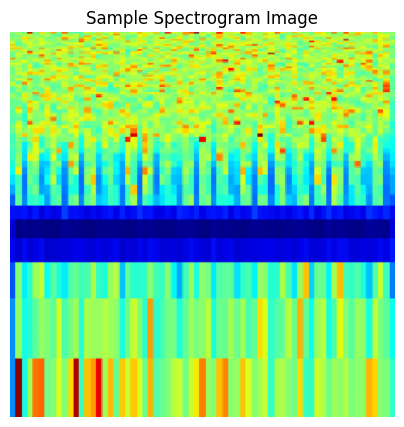

In [36]:
import os
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array

# 📂 Path to the saved spectrograms
spectrogram_folder = "/content/spectrogram_images"

# 🔍 Get a list of all saved images
image_paths = glob.glob(os.path.join(spectrogram_folder, "*.png"))

# ✅ List of valid spectrograms
print(f"✅ Found {len(image_paths)} valid spectrogram images.")

# 📌 Function to load and preprocess images
def load_spectrogram_images(image_paths, img_size=(224, 224)):
    dataset = []
    for img_path in image_paths:
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)  # Load as color image
        img = cv2.resize(img, img_size)  # Resize to match model input size
        img = img_to_array(img) / 255.0  # Normalize
        dataset.append(img)

    return np.array(dataset)

# 🔄 Load all spectrogram images
X_data = load_spectrogram_images(image_paths)

# 📊 Show a sample
plt.figure(figsize=(5,5))
plt.imshow(X_data[0])  # Display first image
plt.title("Sample Spectrogram Image")
plt.axis("off")
plt.show()


In [37]:
import os

# Extract label from filename (Assuming format: "category_index.png")
def get_label_from_filename(filename):
    category = filename.split("_")[0]  # Extract first part of filename
    return category

# Create labels for all images
labels = [get_label_from_filename(os.path.basename(path)) for path in image_paths]

# Convert to NumPy array
y_labels = np.array(labels)

print("✅ Sample Labels:", y_labels[:10])


✅ Sample Labels: ['fixed' 'bird' 'helicopter' 'bird' 'helicopter' 'bird' 'quadrotor'
 'fixed' 'fixed' 'helicopter']


In [38]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(set(y_labels)), activation='softmax')  # Output neurons = number of classes
])

# Compile Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print("✅ CNN Model Ready!")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ CNN Model Ready!


In [39]:
from sklearn.model_selection import train_test_split

# Convert labels to numerical values
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_labels_encoded = encoder.fit_transform(y_labels)

# Split data into training & testing
X_train, X_test, y_train, y_test = train_test_split(X_data, y_labels_encoded, test_size=0.2, random_state=42)

# Train the Model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - accuracy: 0.2785 - loss: 4.9439 - val_accuracy: 0.7412 - val_loss: 0.9676
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step - accuracy: 0.6919 - loss: 0.9033 - val_accuracy: 0.8158 - val_loss: 0.4831
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.7696 - loss: 0.5875 - val_accuracy: 0.8596 - val_loss: 0.3802
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.8468 - loss: 0.4428 - val_accuracy: 0.8947 - val_loss: 0.3085
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.8822 - loss: 0.2936 - val_accuracy: 0.9035 - val_loss: 0.2508
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.9150 - loss: 0.2566 - val_accuracy: 0.8904 - val_loss: 0.3186
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.9172 - loss: 0.2371 - val_accuracy: 0.9167 - val_loss: 0.2107
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.9402 - loss: 0.1738 - val_accuracy: 0.9079 - val_loss:

In [40]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"✅ Model Accuracy: {test_acc:.2f}")


8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 649ms/step - accuracy: 0.9199 - loss: 0.3361
✅ Model Accuracy: 0.92


In [41]:
predictions = model.predict(X_test[:5])
predicted_labels = encoder.inverse_transform(np.argmax(predictions, axis=1))

print("🔍 Predicted Labels:", predicted_labels)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
🔍 Predicted Labels: ['bird' 'bird' 'helicopter' 'quadrotor' 'bird']


In [45]:
import numpy as np

print("Unique classes in y_test:", np.unique(y_test))
print("Unique classes in y_pred:", np.unique(y_pred))



Unique classes in y_test: [11 13 20 21 22 23]
Unique classes in y_pred: [ 9 20 21 22 23]


In [46]:
import numpy as np

print("Unique y_test classes:", np.unique(y_test))
print("Unique y_pred classes:", np.unique(y_pred))

# If you have a label-to-name mapping dictionary, print it
if 'label_map' in globals():
    print("Label Mapping:", label_map)


Unique y_test classes: [11 13 20 21 22 23]
Unique y_pred classes: [ 9 20 21 22 23]


In [50]:
class_names = {
    11: 'missclassified',
    13: 'missclassified',
    20: 'missclassified',
    21: 'helicopter',
    22: 'fixed_wing',
    23: 'bird',
    9: 'quadrotor'  # Adjust if necessary
}


In [51]:
y_test_names = [class_names[label] for label in y_test]
y_pred_names = [class_names[label] for label in y_pred]


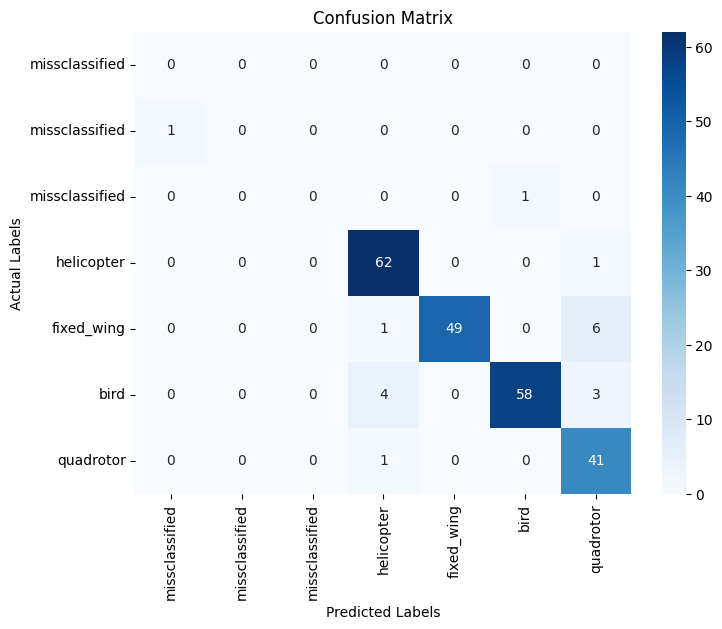

                precision    recall  f1-score   support

missclassified       0.00      0.00      0.00         0
missclassified       0.00      0.00      0.00         1
missclassified       0.00      0.00      0.00         1
    helicopter       0.91      0.98      0.95        63
    fixed_wing       1.00      0.88      0.93        56
          bird       0.98      0.89      0.94        65
     quadrotor       0.80      0.98      0.88        42

      accuracy                           0.92       228
     macro avg       0.53      0.53      0.53       228
  weighted avg       0.93      0.92      0.92       228



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [52]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names.values(), yticklabels=class_names.values())
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_test, y_pred, target_names=class_names.values()))
